In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7.5
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcc2doeXNcTXkgRHJpdmUgKHNnaHlzZWxpQHN0dWRlbnQudWJjLmNhKVxxdWFydG9cZ2l0aHViaW9cY29udGVudFxlb3NjNTU1XGxlY3R1cmVzXGxlY3R1cmU3'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

C:\Users\sghys\AppData\Local\Temp\ipykernel_14440\2496423524.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\importlib\\_bootstrap.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\importlib\\_bootstrap_external.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\zipimport.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\codecs.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\aliases.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\__init__.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\utf_8.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\cp1252.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\abc.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\io.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\stat.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\_collections_abc.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\

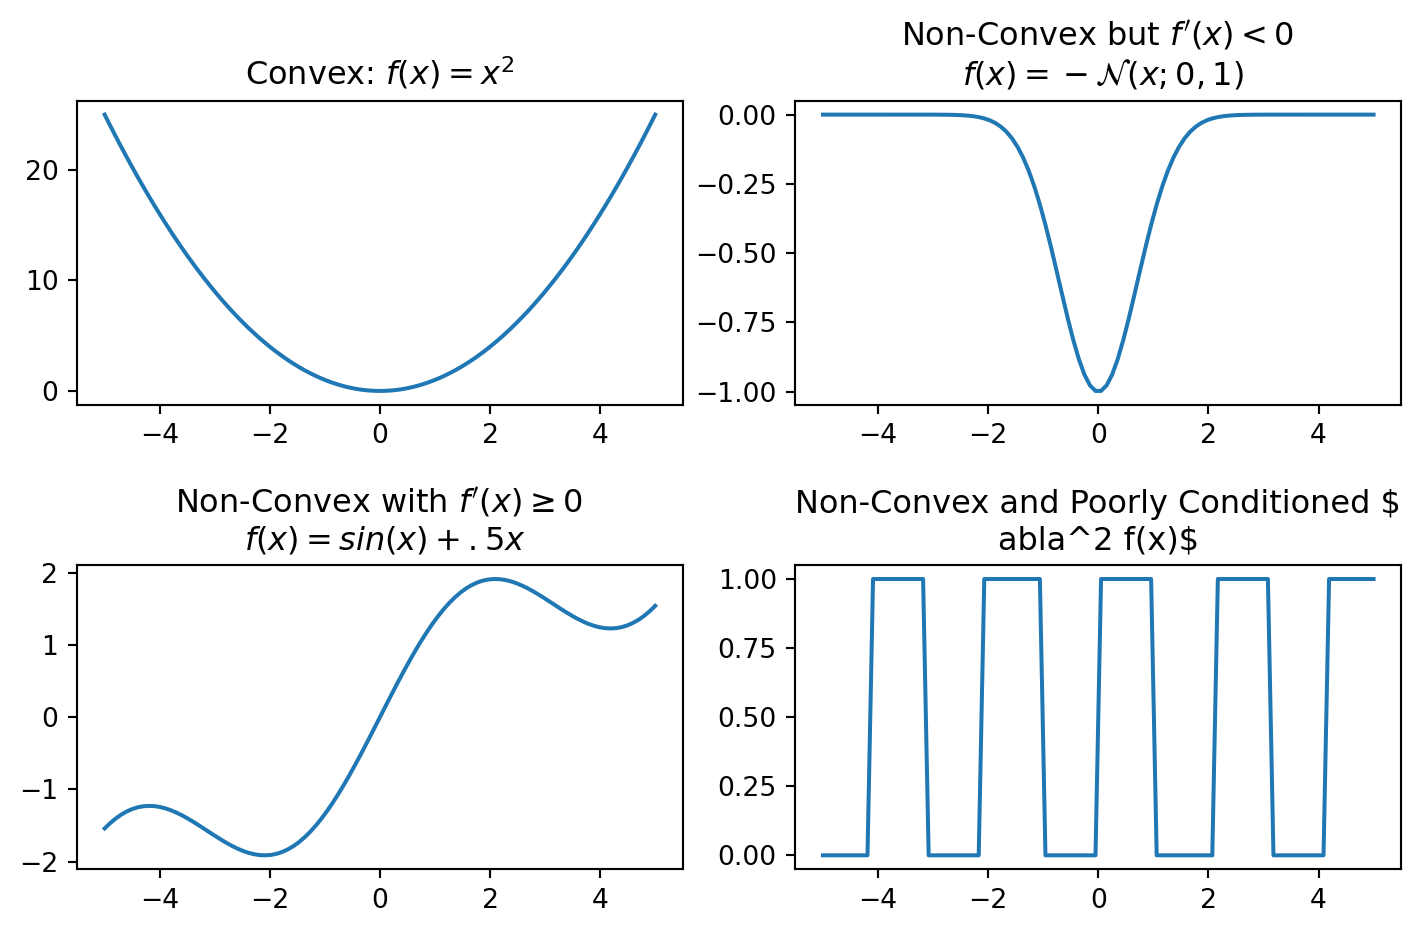

In [2]:
#| label: function-plot
#| fig-cap: Function Categories.
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y1 = x**2
y2 = -np.exp(-x**2)
y3 = np.sin(x) + .5*x

#square wave
def square_wave(x):
    return 1 if np.sin(3*x) > 0 else 0

y4 = [square_wave(xi)**2 for xi in x]

fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(x, y1)
ax[0, 0].set_title("Convex: $f(x) = x^2$")
ax[0, 1].plot(x, y2)
ax[0, 1].set_title("Non-Convex but $f'(x)<0$ \n $f(x) = -\mathcal{N}(x; 0, 1)$")
ax[1, 0].plot(x, y3)
ax[1, 0].set_title("Non-Convex with $f'(x) \geq 0$ \n $f(x) = sin(x)+.5 x$")
ax[1, 1].plot(x, y4)
ax[1, 1].set_title("Non-Convex and Poorly Conditioned $\nabla^2 f(x)$")

plt.tight_layout()
plt.show()

In [3]:
#| label: gaussian-homotopy
#| fig-cap: Gaussian Homotopy.
#| eval: false
#| output: false

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq, fftshift
from matplotlib.animation import FuncAnimation

# Generate a square wave in the time domain
def square_wave(t, period=1.0):
    """Creates a square wave with a given period."""
    return np.where(np.sin(2 * np.pi * t / period) >= 0, 1, -1)

# Time domain setup
t = np.linspace(-1, 1, 500)
square_wave_signal = square_wave(t)
freq = fftfreq(t.size, d=(t[1] - t[0]))
square_wave_fft = fft(square_wave_signal)

# Function to update the plot for each frame, based on current sigma_t
def update_plot(sigma_t, axs, time_text):
    sigma_f = 1 / (2 * np.pi * sigma_t)  # Standard deviation in frequency domain
    gaussian_time_domain = np.exp(-0.5 * (t / sigma_t)**2)
    gaussian_filter = np.exp(-0.5 * (freq / sigma_f)**2)
    filtered_fft = square_wave_fft * gaussian_filter
    smoothed_signal = np.real(ifft(filtered_fft))

    # Update each subplot with new data
    axs[1, 0].clear()
    axs[1, 0].plot(t, gaussian_time_domain, color="purple")
    axs[1, 0].set_title("Gaussian Filter (Time Domain)")
    axs[1, 0].set_xlabel("Time")
    axs[1, 0].set_ylabel("Amplitude")
    axs[1, 0].grid(True)

    axs[1, 1].clear()
    axs[1, 1].plot(fftshift(freq), fftshift(gaussian_filter), color="orange")
    axs[1, 1].set_title("Gaussian Low-Pass Filter (Frequency Domain)")
    axs[1, 1].set_xlabel("Frequency")
    axs[1, 1].set_ylabel("Amplitude")
    axs[1, 1].set_xlim(-50, 50)
    axs[1, 1].grid(True)

    axs[2, 0].clear()
    axs[2, 0].plot(t, square_wave_signal, color="green", linestyle="--")
    axs[2, 0].plot(t, smoothed_signal, color="red")
    axs[2, 0].set_title("Smoothed Signal (Time Domain)")
    axs[2, 0].set_xlabel("Time")
    axs[2, 0].set_ylabel("Amplitude")
    axs[2, 0].grid(True)

    axs[2, 1].clear()
    axs[2, 1].plot(fftshift(freq), fftshift(np.abs(square_wave_fft)), color='blue', linestyle='--')
    axs[2, 1].plot(fftshift(freq), fftshift(np.abs(filtered_fft)), color="orange")
    axs[2, 1].set_title("Filtered Spectrum (Frequency Domain)")
    axs[2, 1].set_xlabel("Frequency")
    axs[2, 1].set_ylabel("Amplitude")
    axs[2, 1].set_xlim(-30, 30)
    axs[2, 1].grid(True)

    # Update the time text
    time_text.set_text(f"T = {T:.2f}")

# Initialize the figure and plot layout for animation
fig, axs = plt.subplots(3, 2, figsize=(12, 10))  # Increased figure size for animation
axs[0, 0].plot(t, square_wave_signal, color='green')
axs[0, 0].set_title("Square Wave (Time Domain)")
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Amplitude")
axs[0, 0].grid(True)

axs[0, 1].plot(fftshift(freq), fftshift(np.abs(square_wave_fft)), color='blue')
axs[0, 1].set_title("Fourier Transform of Square Wave (Frequency Domain)")
axs[0, 1].set_xlabel("Frequency")
axs[0, 1].set_ylabel("Amplitude")
axs[0, 1].set_xlim(-30, 30)
axs[0, 1].grid(True)

# Add a text annotation for time at the bottom of the figure with extra space
time_text = fig.text(0.5, 0.02, "", ha="center", fontsize=12)  # Adjusted position for clarity

# Adjust subplot spacing specifically for animation
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Extra space at the bottom for time text

# Animation settings
steps = 100
def animate(frame):
    global T  # Declare T as a global variable for use in update_plot
    T = 1 - (frame / steps)  # Scale frame number to a T value between 1 and 0
    sigma_t = 0.5 * T + 0.001 * (1 - T)  # Interpolate sigma_t
    update_plot(sigma_t, axs, time_text)

# Create and display the animation
ani = FuncAnimation(fig, animate, frames=steps, interval=100)

# Save the animation as a GIF
ani.save('imgs/gaussian_homotopy.gif', writer='imagemagick', fps=8)

plt.show()

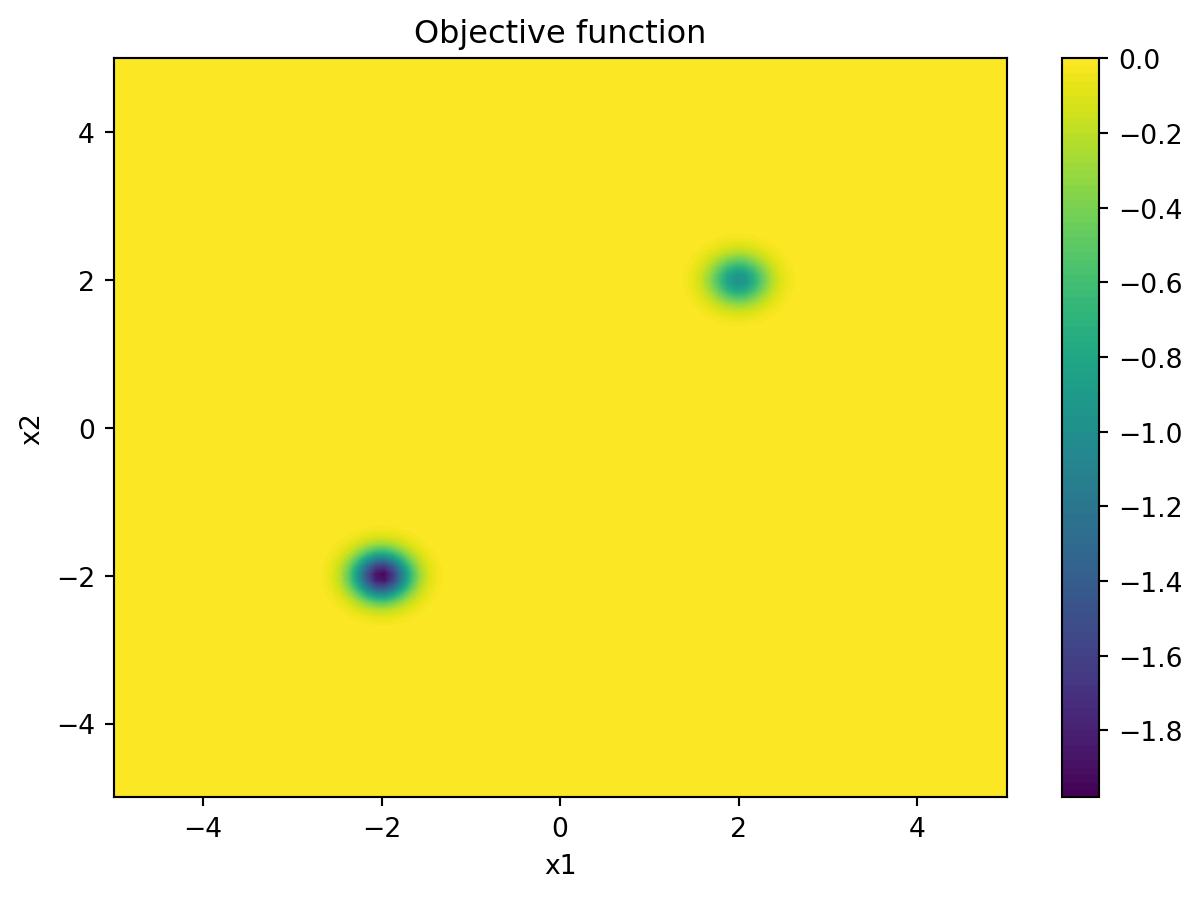

In [4]:
#| label: objective-function
#| fig-cap: Objective Function of Two Gaussians.
import matplotlib.pyplot as plt
import torch

def objective_function(X):
    """
    A 2D function with multiple local minima.

    Parameters:
    X (torch.Tensor): A tensor of shape (N, 2) containing the input points.
    """
    x1 = X[:, 0]
    x2 = X[:, 1]
    y = -torch.exp(-((x1 - 2)**2 + (x2 - 2)**2) / 0.1) \
        - 2 * torch.exp(-((x1 + 2)**2 + (x2 + 2)**2) / 0.1)
    return y

# plot the function
x1 = torch.linspace(-5, 5, 100)
x2 = torch.linspace(-5, 5, 100)
X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
X = torch.stack([X1.flatten(), X2.flatten()], dim=1)
y = objective_function(X).reshape(100, 100)
plt.contourf(X1, X2, y, levels=100)
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Objective function')
plt.show()

In [5]:
#| fig-cap: "Gaussian Homotopy."
#| code-fold: false
def gaussian_homotopy(func, x, batch_size=1000, sigma=1.0, t=0.5):
    """
    Computes the Gaussian homotopy function h(x, t) using Monte Carlo approximation.

    Args:
        func: The original objective function to be optimized.
        x: A tensor of shape (N, D), where N is the number of points and D is the dimension.
        batch_size: Number of samples to use in Monte Carlo approximation.
        sigma: Standard deviation of the Gaussian kernel.
        t: Homotopy parameter, varies from 0 (original function) to 1 (smoothed function).

    Returns:
        y: A tensor of shape (N,), the approximated h(x, t) values at each point x.
    """
    N, D = x.shape
    
    # Sample from the t=1 gaussian kernel
    kernel = torch.randn(batch_size, D) * sigma
    
    # Repeat x and z to compute all combinations
    x_repeated = x.unsqueeze(1).repeat(1, batch_size, 1).view(-1, D)
    kernel_repeated = kernel.repeat(N, 1)
    
    # Compute the monte carlo set of points surrounding each x
    x_input = x_repeated - t * kernel_repeated
    
    # Evaluate the function at the sampled points
    y_input = func(x_input)
    
    # Reshape and average over the batch size to approximate the expectation
    y = y_input.view(N, batch_size).mean(dim=1)
    return y

In [6]:
#| label: homotopy-animation
#| fig-cap: Homotopy Animation.
#| eval: false

# Create grid points
t_values = torch.linspace(-8, 8, 129)
x_grid, y_grid = torch.meshgrid(t_values, t_values, indexing="ij")
X = torch.stack([x_grid.flatten(), y_grid.flatten()], dim=1)

# Define the range of homotopy parameters
T = torch.linspace(1.0, 0.0, steps=30)

# Initialize figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

def update(i):
    ax1.clear()
    ax2.clear()

    t = T[i]
    y_original = objective_function(X).view(129, 129).detach().numpy()
    y_homotopy = gaussian_homotopy(objective_function, X, batch_size=12000, sigma=4.0, t=t).view(129, 129).detach().numpy()

    ax1.contourf(t_values.numpy(), t_values.numpy(), y_original, levels=50, cmap="viridis")
    ax1.set_title("Original Function")
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")

    ax2.contourf(t_values.numpy(), t_values.numpy(), y_homotopy, levels=50, cmap="viridis")
    ax2.set_title(f"Homotopy Function (t = {t:.2f})")
    ax2.set_xlabel("x1")
    ax2.set_ylabel("x2")

    plt.tight_layout()

# Create animation
ani = FuncAnimation(fig, update, frames=len(T), interval=200)

# Save as GIF
ani.save("imgs/homotopy_2d.gif", writer="imagemagick", fps=4)